# Ejercicio 3

## 1) 
Crea una función como la del ejercicio 2 en la que se pase como input: un vector x con la variable
independiente, un parámetro “a”, un parámetro “b” y un valor “sigma”; y que devuelva un vector “y”
que esté distribuido como una función normal con media = a*x + b y sigma = “sigma”.

In [1]:
generaY = function(x, a, b, sigma){
  y = a*x + b + rnorm(x, mean = 0, sd = sigma)
  return (y)
}

Son equivalentes:
* `y = a*x + b + rnorm(x, mean = 0, sd = sigma)`
* `y = rnorm(x, mean = a*x+b, sd = sigma)`

## 2)
Construye una función que reciba dos vectores “x” e “y” supuestamente relacionados linealmente y
calcule los valores de “a” y “b” que minimizan la función de coste.

Para ello utilizaremos la expresión matricial
$$
\alpha = (X^TX)^{-1}X^Ty
\\
$$
donde 
$$
     \alpha = \left(\begin{array}{c}
        \alpha_0\\
        \alpha_1\\
        \alpha_2\\
        \vdots\\
        \alpha_m
        \end{array}
     \right),\quad
     X = \left(\begin{array}{ccccc}
        1 & x_1^1 & x_2^1 & \cdots & x_n^1\\
        1 & x_1^2 & x_2^2 & \cdots & x_n^2\\
        1 & x_1^3 & x_2^3 & \cdots & x_n^3\\
        \vdots & \vdots & \vdots & \ddots & \vdots\\
        1 & x_1^m & x_2^m & \cdots & x_n^m
        \end{array}
     \right),\quad
     y = \left(\begin{array}{c}
        y^1\\
        y^2\\
        y^3\\
        \vdots\\
        y^n
        \end{array}
    \right)
$$

Como estamos realizando un ajuste lineal, será $alpha = (b,a)$

In [2]:
# Creamos una función para crear la matriz X de variables independientes
transPol1=function(x){
  ones = rep(1, length(x))
  xMatrix = cbind(ones, x)
  return(xMatrix)
}
#Función para realizar la regresión lineal
ajusteLineal = function(x,y){
  xMatrix = transPol1(x)
  alpha = solve(t(xMatrix)%*%xMatrix) %*% t(xMatrix) %*% y
  return(alpha)
}

## 3) 
Genera un vector x aleatorio con valores entre 0 y 8 y N = 100 puntos. Usa la función creada en 1 con
valores a=1, b=2 y sigma=2, y la función creada en 2 para encontrar el mínimo de la función de coste.
Pinta en un mismo plot “x” e “y” representados con puntos, y la recta “a*x + b”.

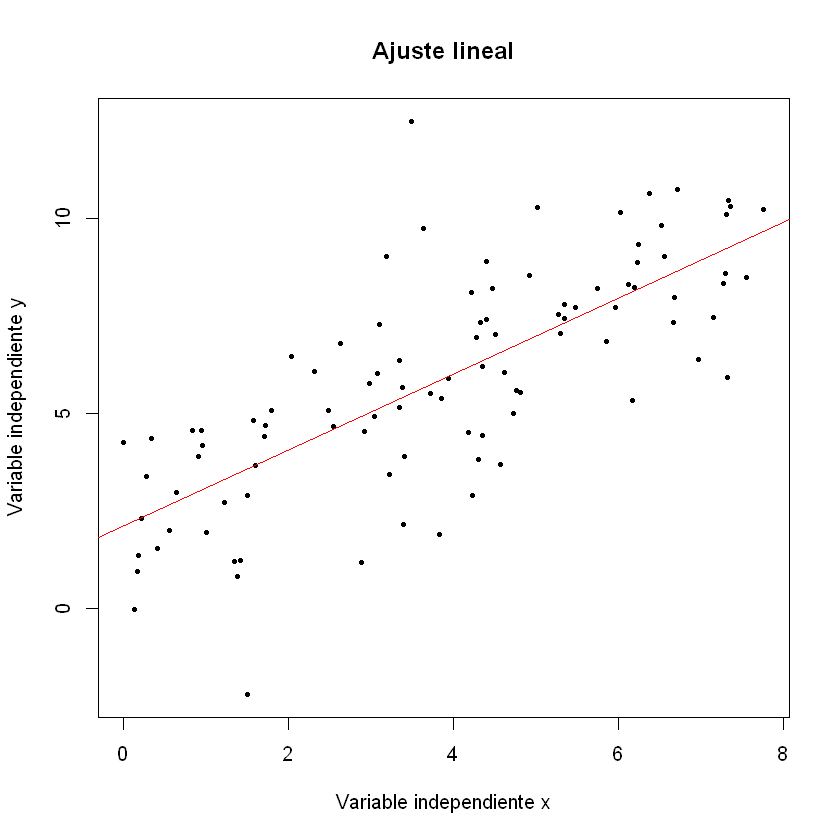

In [3]:
N = 100
a = 1
b = 2
sigma = 2

x = runif(N, min = 0, max = 8)
y = generaY(x, a, b, sigma)

ajus = ajusteLineal(x,y)
plot(x, y, main = "Ajuste lineal",
     xlab = "Variable independiente x", ylab = "Variable independiente y",
     pch = 16, cex = 0.5)
abline(ajus, col = 'red')

El ajuste lineal no parece muy prometedor aunque hayamos generado los datos siguiendo una distribución lineal. Esto se debe simplemente a que el valor de la desviación estándar $\sigma$ es elevado, haciendo que la distribución se disperse en mayor medida.

## 4) 
Construye una función que calcule la matriz de covarianza asociada al ajuste lineal anterior. Utilízala
con los vectores “x” e “y” anteriores y calcula dicha matriz para ese caso particular.

Como las medidas de y son independientes para cada valor de x, la matriz de covarianza $Cov(y)$ tendrá todos los elementos nulos a excepción de la diagonal, con la varianza de $y$:

$$
 \text{Cov}(y) = \left(\begin{array}{cccc}
        \sigma^2 & 0 & \cdots & 0\\
        0 & \sigma^2 & \cdots & 0\\
        0 & 0 & \ddots & 0\\
        0 & 0 & \cdots & \sigma^2
        \end{array}
     \right),
$$ 

La matriz de covarianza de los parámetros será 

$$
\text{Cov}(\alpha) = \left[(X^TX)^{-1}X^T\right] \, \text{Cov}(y) \, \left[(X^TX)^{-1}X^T\right]^T
$$

In [4]:
covMatrix = function(x,y){
  alpha = ajusteLineal(x,y)
  covY = diag(x = var(y-(alpha[1]+x*alpha[2])), nrow = length(y), ncol = length(y))
  xMatrix = transPol1(x)
  
  covAlpha = solve(t(xMatrix)%*%xMatrix) %*% t(xMatrix) %*%
             covY %*%
             t(solve(t(xMatrix)%*%xMatrix) %*% t(xMatrix))
  return(covAlpha)
}
covA = covMatrix(x,y)
covA

,ones,x
ones,0.1453943,-0.02845510
x,-0.0284551,0.00737655


## 5)
Crea una función como la del apartado 1 donde se añadan 3 parámetros más (c, d, e) y en dónde
todo sea igual salvo que media = a + b*x + c*x^2 + d*x^3 + e*x^4

In [5]:
generaPol = function(x, a, b, c, d, e, sigma){
  y = a + b*x + c*x^2 + d*x^3 + e*x^4 + rnorm(x, mean = 0, sd = sigma)
  return (y)
}

In [6]:
# Creamos una función para crear la matriz X de variables independientes
transPol4=function(x){
  ones = rep(1, length(x))
  xMatrix = cbind(ones, poly(x, 4, raw = T))
  return(xMatrix)
}
#Función para realizar la regresión lineal
ajustePol4 = function(x,y){
  xMatrix = transPol4(x)
  alpha = solve(t(xMatrix)%*%xMatrix) %*% t(xMatrix) %*% y
  return(alpha)
}

## 6)
Repite 3 y 4 con la función generada en 5 y usando: a = 107, b=-176, c=86, d=-16, e=1

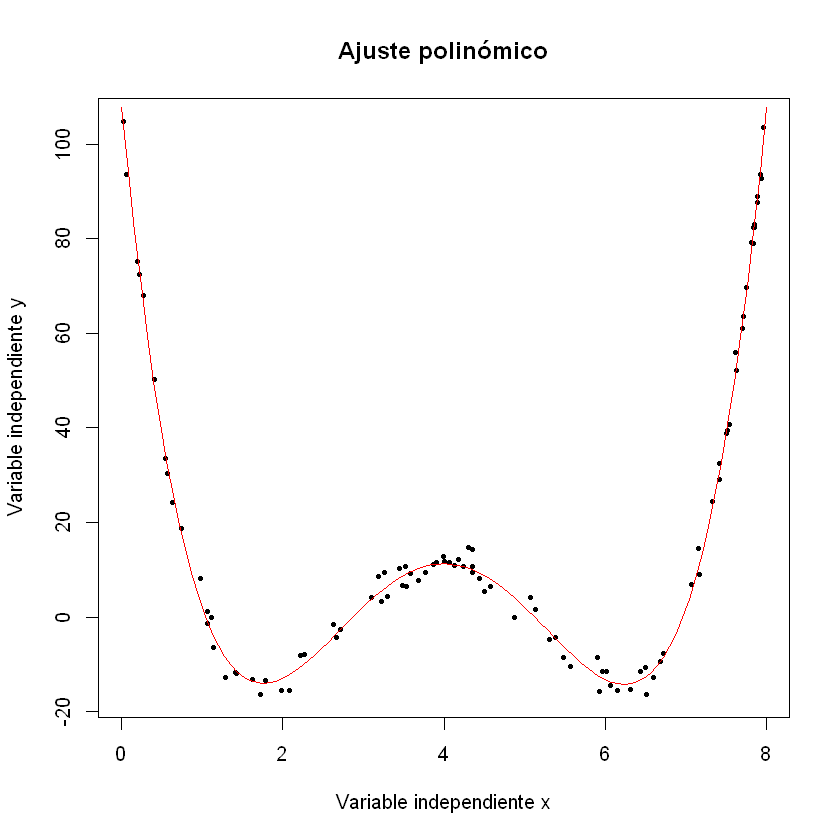

In [7]:
# Definimos los parámetros
N = 100
a = 107
b=-176
c=86
d=-16
e=1
sigma = 2

xrand = runif(N, min = 0, max = 8)
y = generaPol(xrand, a, b, c, d, e, sigma)

alpha4 = ajustePol4(xrand, y)
plot(xrand, y, main = "Ajuste polinómico",
     xlab = "Variable independiente x", ylab = "Variable independiente y",
     pch = 16, cex = 0.5)

x = seq(from = 0, to = 8, by = 8/N)
yPol4 = alpha4[1] + alpha4[2]*x + alpha4[3]*x^2 + alpha4[4]*x^3 + alpha4[5]*x^4
lines(x, yPol4, col = 'red')

En este caso, a pesar de seguir utilizando $\sigma = 2$, el ajuste es más preciso. Esto se debe a que entran en juego un mayor número de parámetros (en concreto, 5 parámetros frente a los 2 del ajuste lineal) por lo que es posible realizar un mejor ajuste.

Calculamos la matriz de covarianza para los parámetros:

In [8]:
covMatrix2 = function(x,y, sigma){
  alpha = ajustePol4(x,y)
  xMatrix = transPol4(x)
  covY = diag(x = sigma^2, nrow = length(y), ncol = length(y))
  
  covAlpha = solve(t(xMatrix)%*%xMatrix) %*% t(xMatrix) %*%
             covY %*%
             t(solve(t(xMatrix)%*%xMatrix) %*% t(xMatrix))
  return(covAlpha)
}

covA2 = covMatrix2(xrand, y, sigma)
covA2

,ones,1,2,3,4
ones,0.936984483,-1.41733874,0.605921839,-0.098289221,5.382282e-03
1,-1.417338744,2.97586809,-1.433655507,0.248083573,-1.415336e-02
2,0.605921839,-1.43365551,0.735460038,-0.132671626,7.795636e-03
3,-0.098289221,0.24808357,-0.132671626,0.024664540,-1.481896e-03
4,0.005382282,-0.01415336,0.007795636,-0.001481896,9.054175e-05
